# Rendimiento del combustible en autos comerciales.

Realizaremos un análisis de diferentes vehículos para poder realizar la prediccion sobre si la cantidad de cilindros de un auto es mayor a 4 cilindros(1) o menor o igual a 4 cilindros(0) a través de una regresión logistica multiple.

Para realizar dicho estudio obtuvimos información del [UCI Machine Learning Repository](https://archive.ics.uci.edu/) específicamente de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) de un estudio de Quinlan, R. (1993).

Dicha información cuenta con las siguientes variables:

MPG: Miles per galon, millas por galón, nuestra variable de interés.    
Cylinders: La cantidad de cilindros del auto.   
Displacement: Volumen total de aire y combustible que un auto puede desplazar en un ciclo de combustión.   
Horsepower: Caballos de fuerza, es una medida de potencia.   
Weight: Peso en libras.   
Acceleration: Aceleración.     
Model year: Año del modelo de auto.   
Origin: País de origen del auto. 1: America, 2: Europa, 3: Asia   
Car Name: Modelo del auto.   
  
La base de datos tenía algunos valores de la variable de interés como NaN, se eliminaron esas filas ya que considero que cualquier manera de conseguir ese valor añadiría incertidumbre a nuestro modelo. Estaríamos construyendo nuestro modelo en terreno que no es firme.

Ajustaremos los datos para poder realizar nuestro objetivo.

In [2]:
import pandas as pd

# Abrimos la base de datos.
df = pd.read_csv("auto-mpg.data-original",  sep='\s+')

# Asignamos nombres a las columnas
df.columns = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model_year", "Origin", "Car name"]

# Imprimimos la base de datos para visualizar nuestra información
display(df.head(3))

#Tiramos el nombre del modelo ya que es unico por cada auto y no nos aportara informacion relevante.
df = df.drop(columns=["Car name"])
print("\nDatos modificados:")
display(df.head(2))

# Creamos la variable binaria de cilindros y soltamos la variable de cilindros
df["Cylinders_binary"] = (df["Cylinders"]>4 ).astype(int)
df = df.drop(["Cylinders"], axis = 1)

# Verificamos
display(df.head(2))


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car name
0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
1,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
2,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst



Datos modificados:


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin
0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
1,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0


,MPG,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Cylinders_binary
0,15.0,350.0,165.0,3693.0,11.5,70.0,1.0,1
1,18.0,318.0,150.0,3436.0,11.0,70.0,1.0,1


Separamos los datos en una proporcion con 80% de entrenamiento y 20% de prueba.

Verificamos la proporcion de los datos de interés.

In [3]:
from sklearn.model_selection import train_test_split

# Obtenemos el eje x
X = df.drop(["Cylinders_binary"], axis=1)

# Obtenemos el eje y
y = df["Cylinders_binary"]

# Separamos los datos en un 80% - 20% en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Obtenemos las proporciones
train_distribution = y_train.value_counts(normalize=True)
test_distribution = y_test.value_counts(normalize=True)
original_distribution = y.value_counts(normalize=True)

# Verificamos que las proporciones son similares
print("Distribucion de los datos originales", original_distribution)
print("Distribucion de los datos de entrenamiento", train_distribution)
print("Distribucion de los datos de prueba", test_distribution)



Distribucion de los datos originales Cylinders_binary
0    0.519182
1    0.480818
Name: proportion, dtype: float64
Distribucion de los datos de entrenamiento Cylinders_binary
0    0.519231
1    0.480769
Name: proportion, dtype: float64
Distribucion de los datos de prueba Cylinders_binary
0    0.518987
1    0.481013
Name: proportion, dtype: float64


Ahora utilizando los datos de prueba se medirá la exactitud del modelo usando una validación cruzada de 5 folds.


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=1000)

# Evaluar exactitud con validación cruzada (usando 5 folds)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring="accuracy")

# Mostrar el promedio de exactitud
cv_mean_accuracy = cv_scores.mean()
print(cv_mean_accuracy)

0.9775729646697389


Ahora entrenaremos un modelo similar pero utilizando todos los datos de prueba, con ese modelo generaremos el vector de posibilidades para los datos de prueba, la matriz de confusión y reportaremos la exactitud, sensibilidad y especificidad del modelo con 3 umbrales: 0.5, 0.3 y 0.8.

Umbral:  0.3 	Accuracy:  0.9746835443037974 	Sensitivity:  1.0 	Specificity:  0.9512195121951219
Umbral:  0.5 	Accuracy:  0.9873417721518988 	Sensitivity:  1.0 	Specificity:  0.975609756097561
Umbral:  0.8 	Accuracy:  1.0 	Sensitivity:  1.0 	Specificity:  1.0


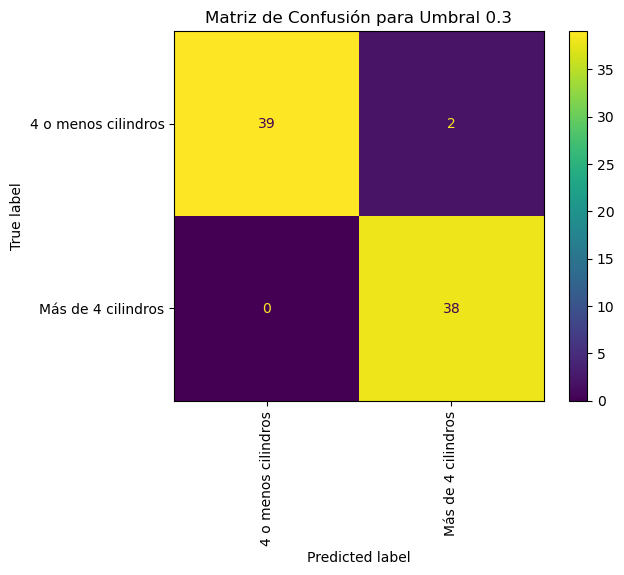

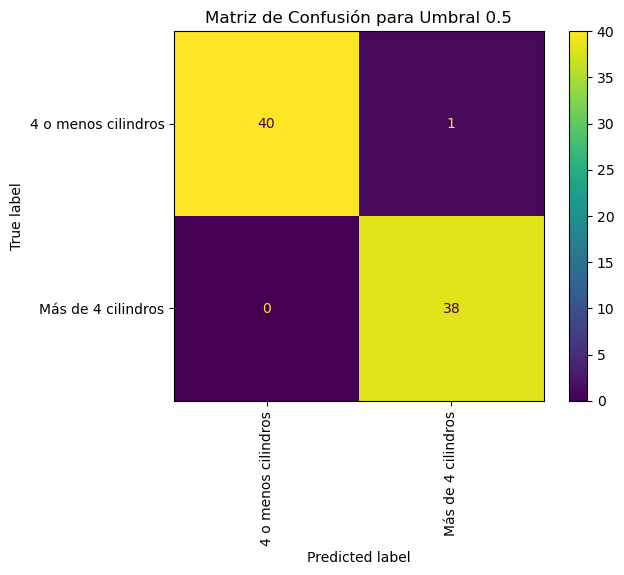

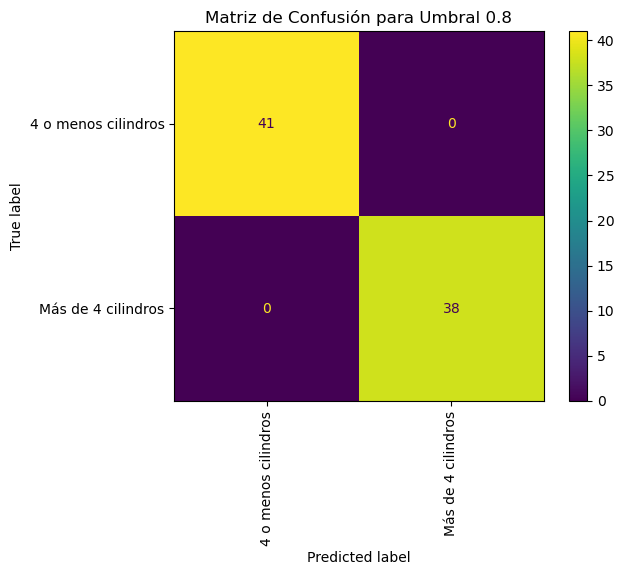

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

%matplotlib inline

# Entrenaremos el modelo de regresión logistica multiple
log_reg.fit(X_train, y_train)

# Obtenemos la probabilidad de y
y_probs = log_reg.predict_proba(X_test)[:,1]


# Definir tres umbrales para la clasificación
umbrales = [0.3, 0.5, 0.8]

# Aquí guardaremos las matrices de confusión
cms = []

# Obtenemos datos por cada umbral
for umbral in umbrales:
    y_pred = (y_probs >= umbral).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)  # Sensibilidad (recall para clase 1)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # Especificidad (TN / (TN + FP))
    cms.append(cm)
    print("Umbral: ", umbral, "\tAccuracy: ", accuracy, "\tSensitivity: ", sensitivity, "\tSpecificity: ", specificity)


#Imprimimos las matrices de confusión
disp = cmd(confusion_matrix=cms[0], display_labels=["4 o menos cilindros", "Más de 4 cilindros"])
fig, ax = plt.subplots()
disp.plot(ax=ax, xticks_rotation="vertical")
ax.set_title("Matriz de Confusión para Umbral 0.3") 
plt.show()

disp = cmd(confusion_matrix=cms[1], display_labels=["4 o menos cilindros", "Más de 4 cilindros"])
fig, ax = plt.subplots()
disp.plot(ax=ax, xticks_rotation="vertical")
ax.set_title("Matriz de Confusión para Umbral 0.5") 
plt.show()

disp = cmd(confusion_matrix=cms[2], display_labels=["4 o menos cilindros", "Más de 4 cilindros"])
fig, ax = plt.subplots()
disp.plot(ax=ax, xticks_rotation="vertical")
ax.set_title("Matriz de Confusión para Umbral 0.8") 
plt.show()


Ahora graficaremos la curva ROC y reportaremos el valor de AUC.

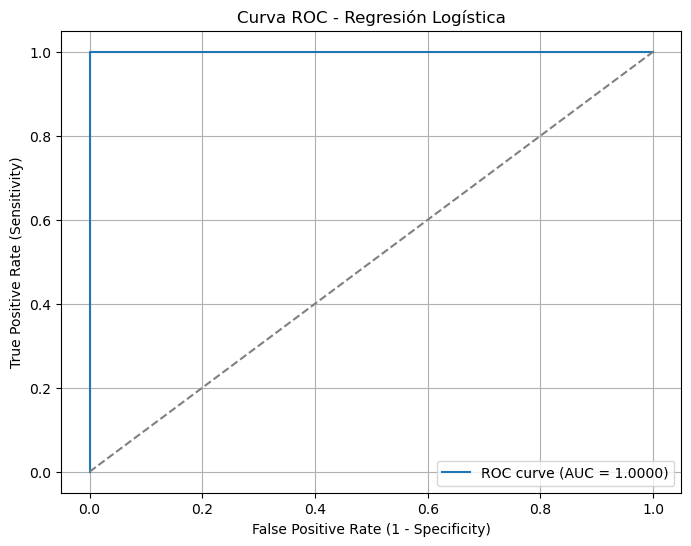

Valor AUC:  1.0


In [6]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_value = roc_auc_score(y_test, y_probs)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.4f})')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Línea diagonal
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.grid()
plt.show()

# Mostrar el valor de AUC
print("Valor AUC: ", auc_value)

Concluimos que: El modelo es un modelo es bastante efectivo al predecir si el auto tiene 4 cilindros o menos, o en su defecto tiene mas de 4 cilindros, incluso se ve impactado en el umbral de desición. Podemos decir que la curva roc es ideal y el valor del AUC también es ideal, nuestro modelo parece ser muy efectivo. Llega a sugerir que existe un overfitting, pero parece ser que si existe un modelo muy bueno porque separamos entre datos de prueba y de entrenamiento, usando la logica me parece algo factible ya que creo que si existen amplias diferencias y claras entre los rendmientos de los autos dependiendo de la cantidad de cilindros en el rango seleccionado.